<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0__4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20-4.csv',
 'data_multi_delta_0_n30-4.csv',
 'data_multi_delta_0_n60-4.csv',
 'data_multi_delta_0_n120-4.csv',
 'data_multi_delta_0_n250-4.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n60-4.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.945592,96.365921,89.530044,0.476041,266.317598,266.061494,0.256104
1,0.0,1.0,23.747757,47.125110,40.406457,0.523515,121.802839,121.407223,0.395616
2,0.0,2.0,74.092727,24.649654,76.600898,1.380886,186.724165,185.040442,1.683723
3,0.0,3.0,20.891357,51.961538,69.707492,-0.704910,151.855478,152.650543,-0.795065
4,0.0,4.0,71.240712,55.345613,93.800948,0.886190,231.273464,230.278299,0.995165
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,58.958991,72.903541,68.798224,-1.096543,209.564213,210.819379,-1.255166
59996,999.0,56.0,67.013890,69.651628,22.427566,-0.468325,168.624760,169.045605,-0.420845
59997,999.0,57.0,75.561333,31.975739,57.178908,-0.610246,174.105735,174.519671,-0.413936
59998,999.0,58.0,53.576314,59.486046,85.948379,-0.912794,208.097945,209.170507,-1.072563


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.945592,96.365921,89.530044,0.476041,266.317598,266.061494,0.256104
1,0.0,1.0,23.747757,47.125110,40.406457,0.523515,121.802839,121.407223,0.395616
2,0.0,2.0,74.092727,24.649654,76.600898,1.380886,186.724165,185.040442,1.683723
3,0.0,3.0,20.891357,51.961538,69.707492,-0.704910,151.855478,152.650543,-0.795065
4,0.0,4.0,71.240712,55.345613,93.800948,0.886190,231.273464,230.278299,0.995165
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,58.958991,72.903541,68.798224,-1.096543,209.564213,210.819379,-1.255166
59996,999.0,56.0,67.013890,69.651628,22.427566,-0.468325,168.624760,169.045605,-0.420845
59997,999.0,57.0,75.561333,31.975739,57.178908,-0.610246,174.105735,174.519671,-0.413936
59998,999.0,58.0,53.576314,59.486046,85.948379,-0.912794,208.097945,209.170507,-1.072563


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.945592  96.365921  89.530044  ...  266.317598  266.061494  0.256104
      1.0    23.747757  47.125110  40.406457  ...  121.802839  121.407223  0.395616
      2.0    74.092727  24.649654  76.600898  ...  186.724165  185.040442  1.683723
      3.0    20.891357  51.961538  69.707492  ...  151.855478  152.650543 -0.795065
      4.0    71.240712  55.345613  93.800948  ...  231.273464  230.278299  0.995165
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   58.958991  72.903541  68.798224  ...  209.564213  210.819379 -1.255166
      56.0   67.013890  69.651628  22.427566  ...  168.624760  169.045605 -0.420845
      57.0   75.561333  31.975739  57.178908  ...  174.105735  174.519671 -0.413936
      58.0   53.576314  59.486046  85.948379  ...  208.097945  209.170507 -1.072563
      59.0   20.732058  66.013594  29.324118  ...  127.361472  126.235769  1.125703

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.945592  96.365921  89.530044  ...  266.317598  266.061494  0.256104
      1.0    23.747757  47.125110  40.406457  ...  121.802839  121.407223  0.395616
      2.0    74.092727  24.649654  76.600898  ...  186.724165  185.040442  1.683723
      3.0    20.891357  51.961538  69.707492  ...  151.855478  152.650543 -0.795065
      4.0    71.240712  55.345613  93.800948  ...  231.273464  230.278299  0.995165
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   58.958991  72.903541  68.798224  ...  209.564213  210.819379 -1.255166
      56.0   67.013890  69.651628  22.427566  ...  168.624760  169.045605 -0.420845
      57.0   75.561333  31.975739  57.178908  ...  174.105735  174.519671 -0.413936
      58.0   53.576314  59.486046  85.948379  ...  208.097945  209.170507 -1.072563
      59.0   20.732058  66.013594  29.324118  ...  127.361472  126.235769  1.125703

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.945592,96.365921,89.530044,0.476041,266.317598,266.061494,0.256104
1,0.0,1.0,23.747757,47.125110,40.406457,0.523515,121.802839,121.407223,0.395616
2,0.0,2.0,74.092727,24.649654,76.600898,1.380886,186.724165,185.040442,1.683723
3,0.0,3.0,20.891357,51.961538,69.707492,-0.704910,151.855478,152.650543,-0.795065
4,0.0,4.0,71.240712,55.345613,93.800948,0.886190,231.273464,230.278299,0.995165
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,58.958991,72.903541,68.798224,-1.096543,209.564213,210.819379,-1.255166
59996,999.0,56.0,67.013890,69.651628,22.427566,-0.468325,168.624760,169.045605,-0.420845
59997,999.0,57.0,75.561333,31.975739,57.178908,-0.610246,174.105735,174.519671,-0.413936
59998,999.0,58.0,53.576314,59.486046,85.948379,-0.912794,208.097945,209.170507,-1.072563


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.945592  96.365921  89.530044  ...  266.317598  266.061494  0.256104
      1.0    23.747757  47.125110  40.406457  ...  121.802839  121.407223  0.395616
      2.0    74.092727  24.649654  76.600898  ...  186.724165  185.040442  1.683723
      3.0    20.891357  51.961538  69.707492  ...  151.855478  152.650543 -0.795065
      4.0    71.240712  55.345613  93.800948  ...  231.273464  230.278299  0.995165
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   58.958991  72.903541  68.798224  ...  209.564213  210.819379 -1.255166
      56.0   67.013890  69.651628  22.427566  ...  168.624760  169.045605 -0.420845
      57.0   75.561333  31.975739  57.178908  ...  174.105735  174.519671 -0.413936
      58.0   53.576314  59.486046  85.948379  ...  208.097945  209.170507 -1.072563
      59.0   20.732058  66.013594  29.324118  ...  127.361472  126.235769  1.125703

[60000 rows x 7 columns]

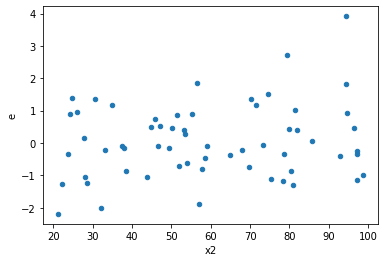

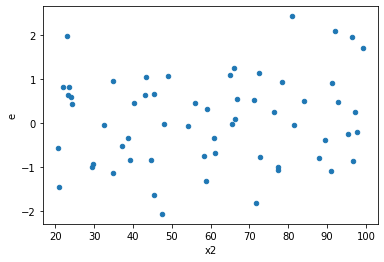

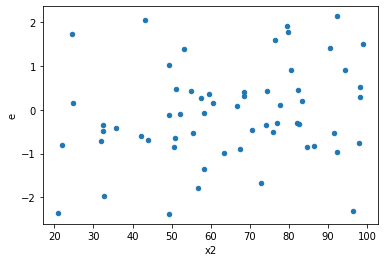

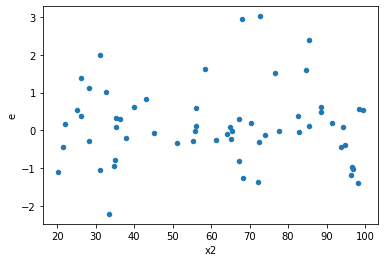

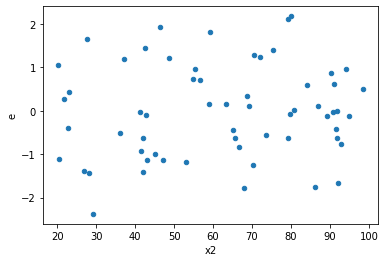

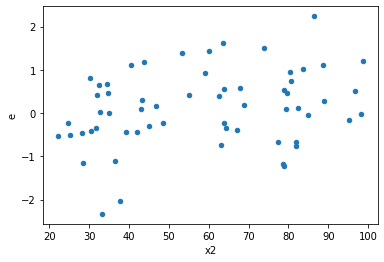

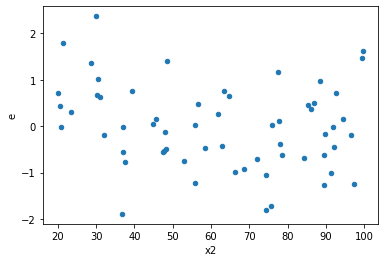

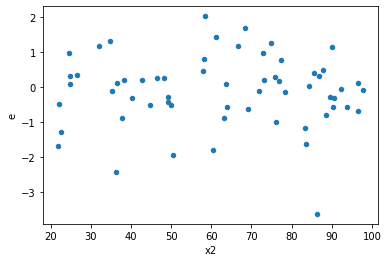

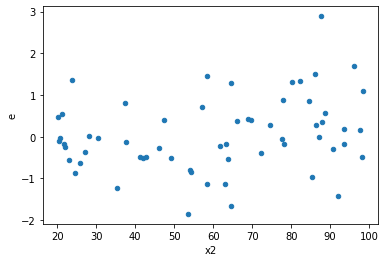

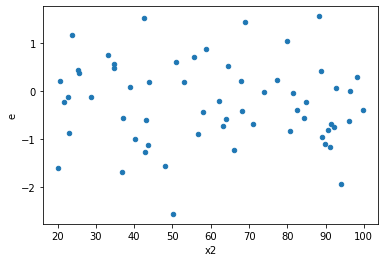

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,21.33032962485879,38.32525538216805,1.015729982136133,1.8250121610556216,1.796749326250591,0.18764939656486668,0.9061753017175667,0.09382469828243334,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,21.132144131761752,26.383536580443142,1.0062925777029406,1.2563588847830067,1.24850258525298,0.61565645240879,0.692171773795605,0.307828226204395,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,17.067531684570994,24.575163026171914,0.8127396040271903,1.1702458583891389,1.4398779788636806,0.4104023599346811,0.7947988200326594,0.20520117996734055,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,16.235992418390786,17.372395841194326,0.773142496113847,0.8272569448187774,1.0699928525167526,0.8782705401620146,0.5608647299189927,0.4391352700810073,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,8.401223897659012,18.19358789541663,0.40005828084090533,0.8663613283531729,2.165587790189266,0.083860799775751,0.9580696001121245,0.0419303998878755,Reject001=1 : Homoscedasticity
13.0,21.0,21.0,15.797042752376449,26.04610361293934,0.7522401310655452,1.2402906482352067,1.6487961716138966,0.2599757493741941,0.870012125312903,0.12998787468709705,Reject001=1 : Homoscedasticity
16.0,21.0,21.0,14.825174045140383,20.130715688865386,0.7059606688162087,0.9586055089935899,1.3578738183828698,0.4893570099189928,0.7553214950405036,0.2446785049594964,Reject001=1 : Homoscedasticity
18.0,21.0,21.0,12.665597126787798,17.420403449663894,0.6031236727041809,0.8295430214125664,1.375411145268442,0.4713933905630898,0.7643033047184551,0.2356966952815449,Reject001=1 : Homoscedasticity
21.0,21.0,21.0,9.34818194351768,15.033562906077533,0.44515152111988954,0.715883947908454,1.6081803923919424,0.2842656533089407,0.8578671733455296,0.14213282665447036,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,21.33032962485879,38.32525538216805,1.015729982136133,1.8250121610556216,1.796749326250591,0.18764939656486668,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,21.132144131761752,26.383536580443142,1.0062925777029406,1.2563588847830067,1.24850258525298,0.61565645240879,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,29.816954500249825,24.143675314429597,1.4198549762023727,1.1496988244966475,0.8097297567471992,0.6330563574690702,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,17.067531684570994,24.575163026171914,0.8127396040271903,1.1702458583891389,1.4398779788636806,0.4104023599346811,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,31.098991673635812,19.667687288866254,1.480904365411229,0.9365565375650597,0.6324220249732261,0.30159716535032505,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,16.578927286690437,15.492344596789971,0.7894727279376399,0.7377306950852367,0.9344600123330793,0.8780305100996713,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,16.235992418390786,17.372395841194326,0.773142496113847,0.8272569448187774,1.0699928525167526,0.8782705401620146,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,18.789540985199643,16.57452575728882,0.8947400469142688,0.7892631312994677,0.8821144577371224,0.7764775372199477,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,8.401223897659012,18.19358789541663,0.40005828084090533,0.8663613283531729,2.165587790189266,0.083860799775751,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      991
Reject001=0 : Heteroscedasticity      9
Name: Result_test, dtype: int64